In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [68]:
# Importing store data
df_revenue = pd.read_csv('fake_clinic_data_extract_test (1).csv')
df_revenue.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00


In [69]:
#string to date format
df_revenue['Month'] = pd.to_datetime(df_revenue['appointment_date'],infer_datetime_format=True)
df_revenue.head(5)

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment,Month
0,2021-12-30,clinic_2,70172,1030,30,98.13,2021-12-30
1,2021-12-29,clinic_1,53371,756,15,65.13,2021-12-29
2,2021-12-29,clinic_2,69545,1030,30,105.18,2021-12-29
3,2021-12-27,clinic_1,43859,756,30,58.11,2021-12-27
4,2021-12-23,clinic_1,69303,756,30,119.00,2021-12-23


In [77]:
df_revenue_1 = df_revenue.copy()

In [78]:
df_revenue_1.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment,Month
0,2021-12-30,clinic_2,70172,1030,30,98.13,2021-12-30
1,2021-12-29,clinic_1,53371,756,15,65.13,2021-12-29
2,2021-12-29,clinic_2,69545,1030,30,105.18,2021-12-29
3,2021-12-27,clinic_1,43859,756,30,58.11,2021-12-27
4,2021-12-23,clinic_1,69303,756,30,119.00,2021-12-23


In [70]:
df_revenue.isnull().sum() #check for null values (375 present in the dataset)

appointment_date               0
clinic_name                    0
patient_id                     0
practitioner_id                0
appointment_duration_min       0
revenues_from_appointment    375
Month                          0
dtype: int64

In [71]:
df_revenue.shape

(4071, 7)

In [72]:
(375/4071)*100 #check for percentage of null values i.e. 9.2% in this case which is not very high, but I will replace them

9.211495946941783

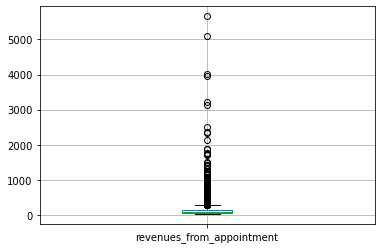

In [76]:
#Considering the boxplot here, it gives a clear picture that majority of the data lies below 1000, and there are quite some outliers

df_revenue.boxplot(['revenues_from_appointment']); 

In [80]:
#Replaced null values with median
df_revenue.fillna(df_revenue['revenues_from_appointment'].median(), inplace=True)
print(df_revenue)

     appointment_date clinic_name  patient_id  practitioner_id  \
0          2021-12-30    clinic_2       70172             1030   
1          2021-12-29    clinic_1       53371              756   
2          2021-12-29    clinic_2       69545             1030   
3          2021-12-27    clinic_1       43859              756   
4          2021-12-23    clinic_1       69303              756   
...               ...         ...         ...              ...   
4066       2021-08-19    clinic_1       44907              755   
4067       2021-09-02    clinic_1       45056              757   
4068       2021-08-19    clinic_1       44919              757   
4069       2021-07-22    clinic_1       45055              755   
4070       2021-07-22    clinic_1       44912              755   

      appointment_duration_min  revenues_from_appointment      Month  
0                           30                      98.13 2021-12-30  
1                           15                      65.13 2021-12

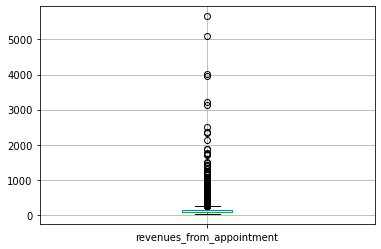

In [82]:
df_revenue.boxplot(['revenues_from_appointment']); 

In [81]:
df_revenue.isnull().sum() # No null values now

appointment_date             0
clinic_name                  0
patient_id                   0
practitioner_id              0
appointment_duration_min     0
revenues_from_appointment    0
Month                        0
dtype: int64

In [83]:
#groupby date and sum the revenue values
df_revenue = df_revenue.groupby('Month').revenues_from_appointment.sum().reset_index()

In [84]:
df_revenue.head() #aggregating all the dates with the sum of the revenues

,Month,revenues_from_appointment
0,2021-06-28,1622.54
1,2021-06-29,1052.20
2,2021-06-30,891.24
3,2021-07-01,443.66
4,2021-07-02,443.55


In [85]:
df_revenue = df_revenue.set_index(['Month']) #Month is set as the index
df_revenue.head(5)

,revenues_from_appointment
Month,
2021-06-28,1622.54
2021-06-29,1052.20
2021-06-30,891.24
2021-07-01,443.66
2021-07-02,443.55


In [89]:
df_revenue['revenues_from_appointment'].describe()

count      132.000000
mean      4800.985000
std       2470.315604
min        443.550000
25%       3008.662500
50%       4550.595000
75%       6022.815000
max      12699.030000
Name: revenues_from_appointment, dtype: float64

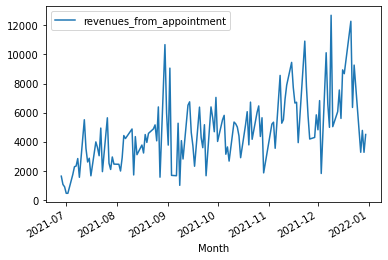

In [86]:
df_revenue.plot();

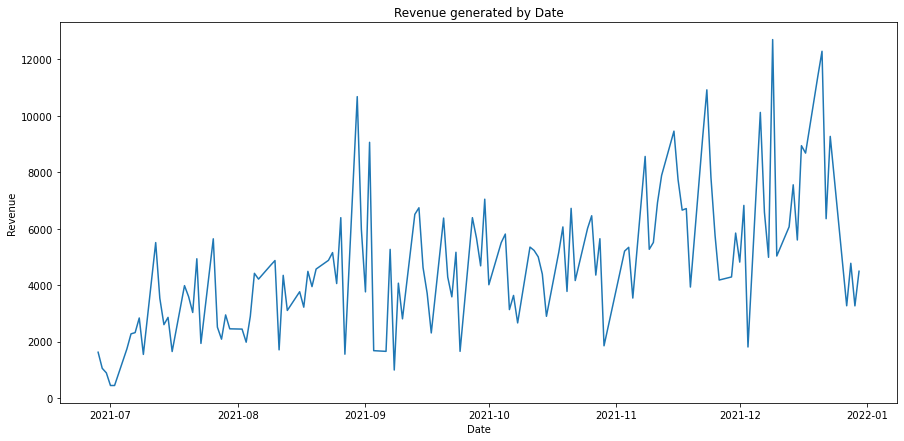

In [90]:
plt.figure(figsize=(15,7))
plt.title("Revenue generated by Date")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(df_revenue['revenues_from_appointment'])
plt.show()

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_revenue, model="additive")
decompose_data.plot();

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [94]:
# ADF stationarity test
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller Test:')
dftest = adfuller(df_revenue['revenues_from_appointment'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.961847
p-value                          0.303548
#Lags Used                       9.000000
Number of Observations Used    122.000000
Critical Value (1%)             -3.485122
Critical Value (5%)             -2.885538
Critical Value (10%)            -2.579569
dtype: float64


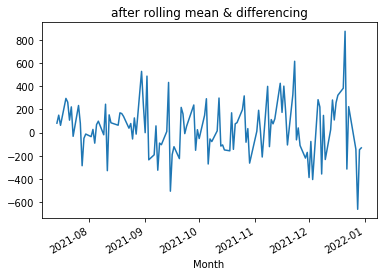

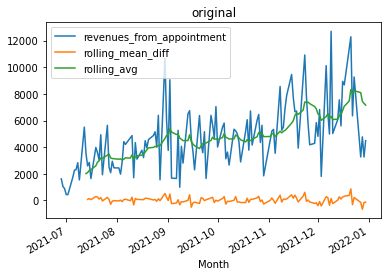

In [97]:
"""
rolling_mean = df_revenue.rolling(window = 12).mean()
df_revenue['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
df_revenue['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df_revenue.plot(title='original');
"""
#Appling the rolling mean differencing to removie non-stationarity



df_revenue["rolling_avg"] = df_revenue["revenues_from_appointment"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
#df_revenue["rolling_std"] = df_revenue["revenues_from_appointment"].rolling(window=12).std()
df_revenue['rolling_mean_diff'] = df_revenue["rolling_avg"] - df_revenue["rolling_avg"].shift()
ax1 = plt.subplot()
df_revenue['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df_revenue.plot(title='original');



In [98]:
dftest = adfuller(df_revenue['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

#p-value < 0.05 which implies data has become stationary

1. ADF :  -5.318615611851164
2. P-Value :  5.009848755360621e-06
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 107
5. Critical Values :
	 1% :  -3.492995948509562
	 5% :  -2.888954648057252
	 10% :  -2.58139291903223


In [99]:
#ARIMA

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_revenue['revenues_from_appointment'],order=(1,1,1))
history=model.fit()

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associat

In [100]:
history.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                  
=======================================================================================
Dep. Variable:     D.revenues_from_appointment   No. Observations:                  131
Model:                          ARIMA(1, 1, 1)   Log Likelihood               -1183.050
Method:                                css-mle   S.D. of innovations           1985.641
Date:                         Fri, 03 Jun 2022   AIC                           2374.101
Time:                                 13:17:47   BIC                           2385.602
Sample:                                      1   HQIC                          2378.774
                                                                                       
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                38.3348      4.753      8.066      0.000      29.020      47.650
ar.L1.D.revenues_from_appointment     0.0466      0.088      0.529      0.597      -0.126       0.219
ma.L1.D.revenues_from_appointment    -1.0000      0.023    -43.716      0.000      -1.045      -0.955
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           21.4652           +0.0000j           21.4652            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

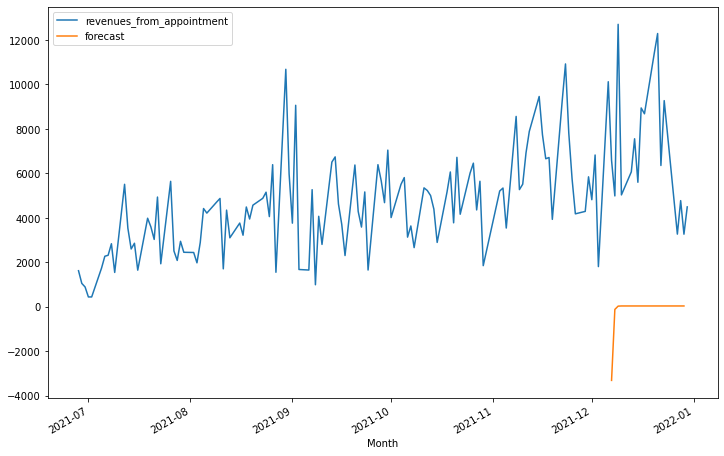

In [109]:
df_revenue['forecast']=history.predict(start=115,end=130,dynamic=True)
df_revenue[['revenues_from_appointment','forecast']].plot(figsize=(12,8));

#Model is very bad as seen below

In [126]:
model=ARIMA(df_revenue['rolling_mean_diff'].dropna(),order=(5,2,4))
model_fit=model.fit()

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associat

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


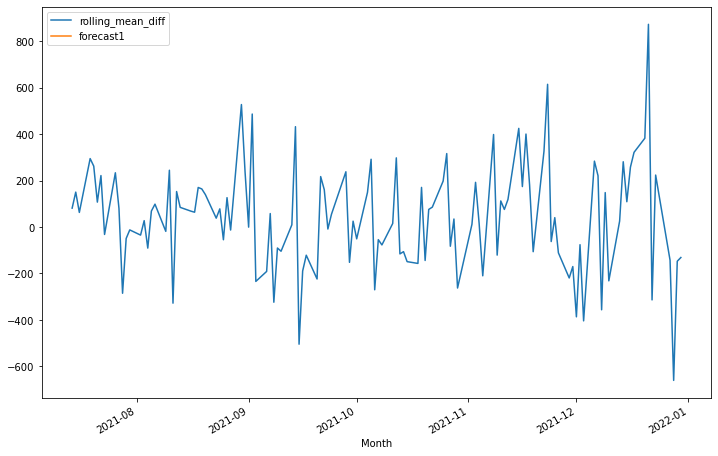

In [127]:
df_revenue['forecast1']=model_fit.predict(start=115,end=130,dynamic=True)
df_revenue[['rolling_mean_diff','forecast1']].plot(figsize=(12,8));

In [101]:
df_revenue.shape

(132, 3)

In [132]:
del df_revenue['forecast']

In [133]:
del df_revenue['forecast1']

In [134]:
df_revenue.head()

,revenues_from_appointment,rolling_mean_diff,rolling_avg
Month,,,
2021-06-28,1622.54,NaN,NaN
2021-06-29,1052.20,NaN,NaN
2021-06-30,891.24,NaN,NaN
2021-07-01,443.66,NaN,NaN
2021-07-02,443.55,NaN,NaN


In [147]:
#SARIMAX modeling

import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df_revenue['revenues_from_appointment'],order=(1, 1, 1),seasonal_order=(2,2,1,12))
results=model.fit()

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


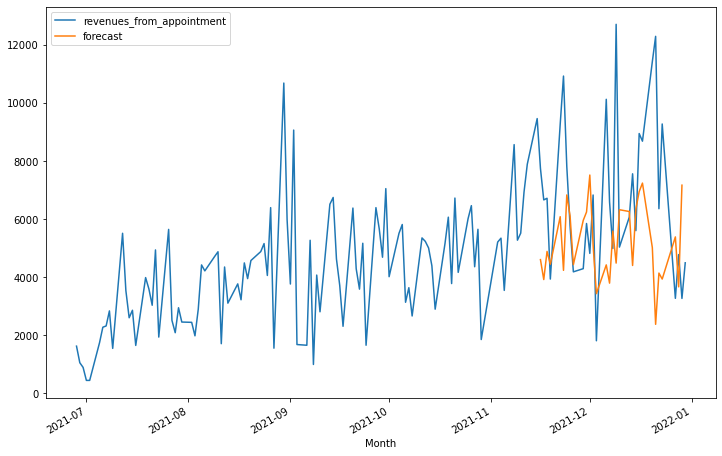

In [148]:
df_revenue['forecast']=results.predict(start=100,end=130,dynamic=True)
df_revenue[['revenues_from_appointment','forecast']].plot(figsize=(12,8));

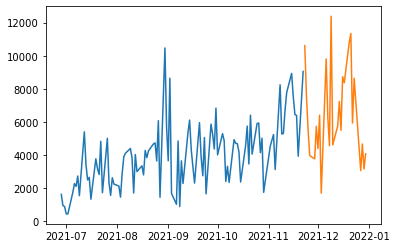

In [11]:
#Train and test division
train = df_revenue[:105]
test = df_revenue[-27:]
plt.plot(train)
plt.plot(test)

Rolling Statistics

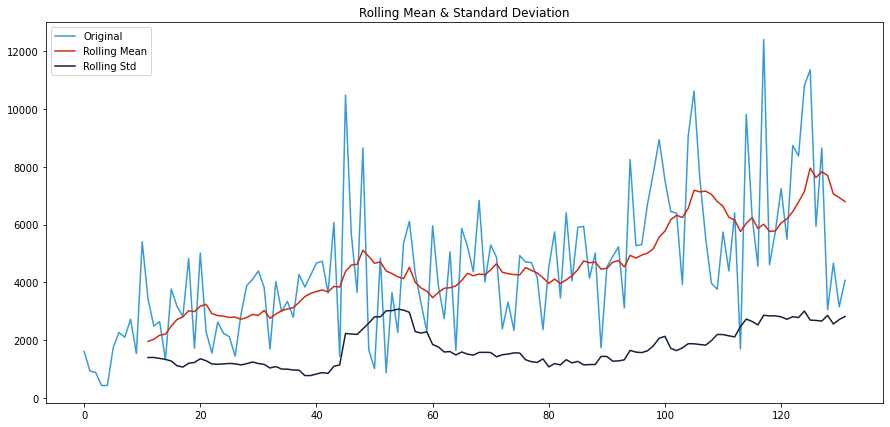

In [9]:
#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_revenue["revenues_from_appointment"], color='#379BDB', label='Original')
plt.plot(df_revenue["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df_revenue["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Results of Dickey Fuller Test:
Test Statistic                  -1.961847
p-value                          0.303548
#Lags Used                       9.000000
Number of Observations Used    122.000000
Critical Value (1%)             -3.485122
Critical Value (5%)             -2.885538
Critical Value (10%)            -2.579569
dtype: float64


ARIMA Model Selection w/ Auto-ARIMA

In [13]:
from pmdarima.arima import auto_arima
ARIMA_model = auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1745.011, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1699.945, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1712.797, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1689.457, Time=0.78 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1687.253, Time=1.17 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1680.765, Time=2.24 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1682.171, Time=3.63 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.09 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.39 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=8.03 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=1719.171, Time=0.56 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=1667.908, Time=2.58 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=1671.279, Time=1.42 sec
 ARIMA(2,1,0)(5,1,0)[12]             : 

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


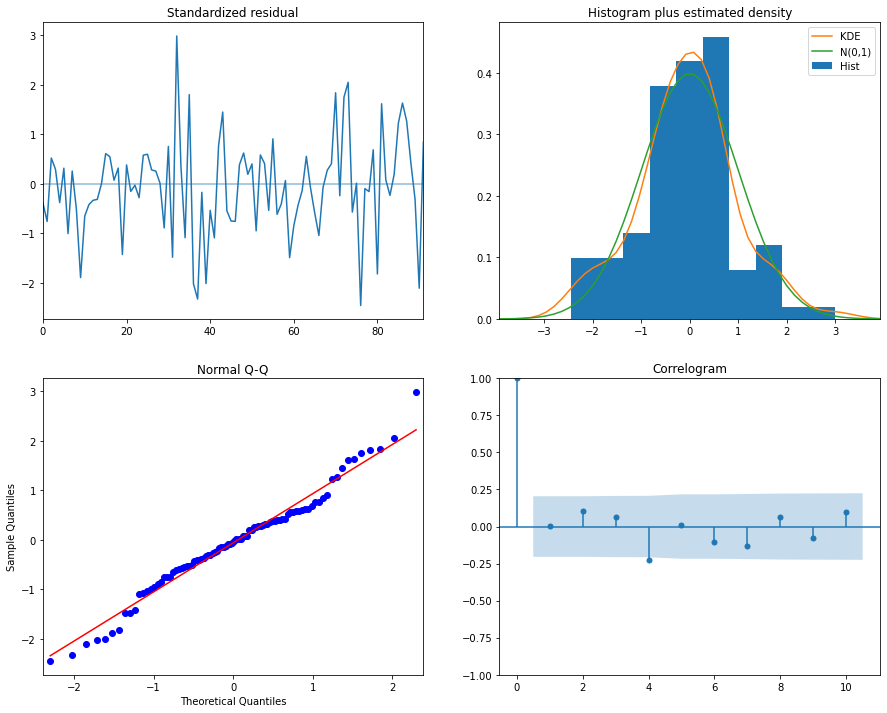

In [14]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [15]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(4, 1, 1, 12)   Log Likelihood                -824.287
Date:                            Fri, 03 Jun 2022   AIC                           1664.574
Time:                                    10:43:30   BIC                           1684.749
Sample:                                         0   HQIC                          1672.717
                                            - 105                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1852      0.112     -1.656      0.098      -0.404       0.034
ma.L1         -0.7785      0.094     -8.311      0.000      -0.962      -0.595
ar.S.L12      -1.3747      0.186     -7.380      0.000      -1.740      -1.010
ar.S.L24      -1.1374      0.215     -5.298      0.000      -1.558      -0.717
ar.S.L36      -0.7911      0.167     -4.724      0.000      -1.119      -0.463
ar.S.L48      -0.5098      0.139     -3.680      0.000      -0.781      -0.238
ma.S.L12       0.8653      0.322      2.688      0.007       0.234       1.496
sigma2      2.744e+06    2.3e-07   1.19e+13      0.000    2.74e+06    2.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.98   Prob(JB):                         0.51
Heteroskedasticity (H):               3.01   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+28. Standard errors may be unstable.
"""

In [16]:
prediction = pd.DataFrame(ARIMA_model.predict(n_periods = 27), index = test.index)
prediction.columns = ['predicted revenue']
prediction

,predicted revenue
Month,
2021-11-23,7736.150719
2021-11-24,8213.371352
2021-11-25,5977.137668
2021-11-26,8170.045072
2021-11-29,4764.072297
2021-11-30,4797.386988
2021-12-01,8132.898235
2021-12-02,5682.563084
2021-12-03,7144.821920


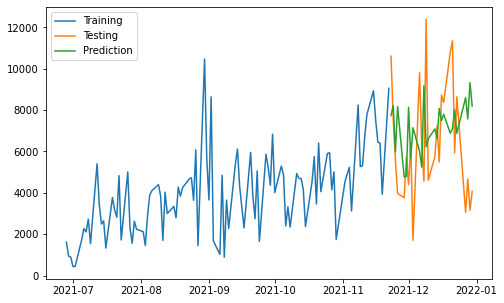

In [17]:
plt.figure(figsize = (8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'upper left')
plt.show()

SARIMA Model


In [18]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


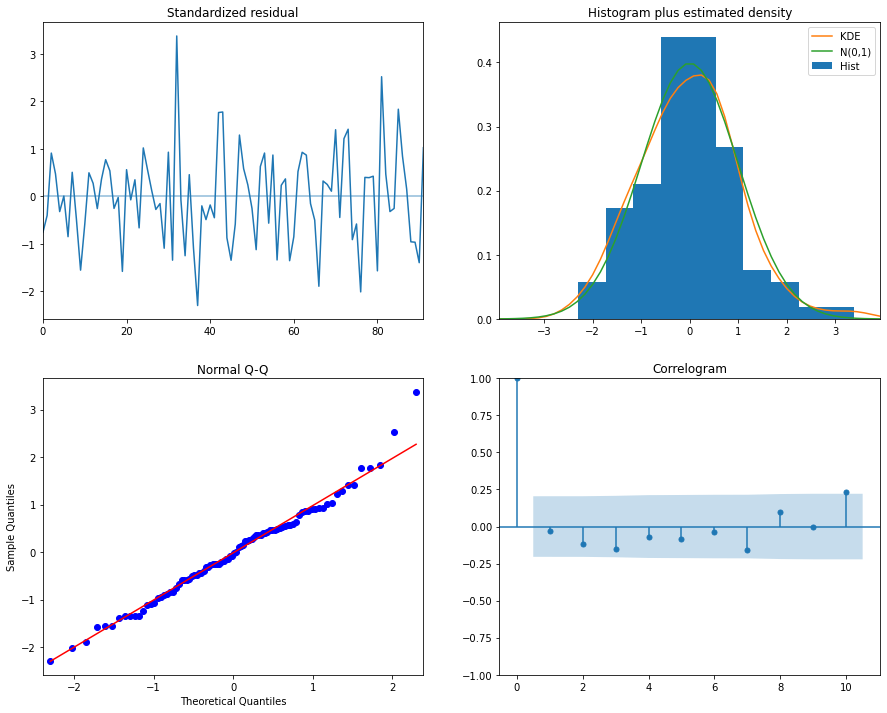

In [19]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [20]:
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 12)   Log Likelihood                -829.274
Date:                             Fri, 03 Jun 2022   AIC                           1670.547
Time:                                     10:45:32   BIC                           1685.678
Sample:                                          0   HQIC                          1676.654
                                             - 105                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2261      0.128     -9.546      0.000      -1.478      -0.974
ar.L2         -0.6490      0.105     -6.195      0.000      -0.854      -0.444
ma.L1          0.4178      0.180      2.323      0.020       0.065       0.770
ar.S.L12      -0.6344      0.124     -5.126      0.000      -0.877      -0.392
ar.S.L24      -0.3558      0.129     -2.761      0.006      -0.608      -0.103
sigma2      3.875e+06    5.7e+05      6.795      0.000    2.76e+06    4.99e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.48
Prob(Q):                              0.76   Prob(JB):                         0.18
Heteroskedasticity (H):               2.49   Skew:                             0.35
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
prediction = pd.DataFrame(SARIMA_model.predict(n_periods = 27), index = test.index)
prediction.columns = ['predicted revenue']
prediction

,predicted revenue
Month,
2021-11-23,5305.089130
2021-11-24,7546.260488
2021-11-25,7951.309053
2021-11-26,5063.540845
2021-11-29,7562.200050
2021-11-30,7103.172296
2021-12-01,7831.530834
2021-12-02,7951.955572
2021-12-03,6135.238060


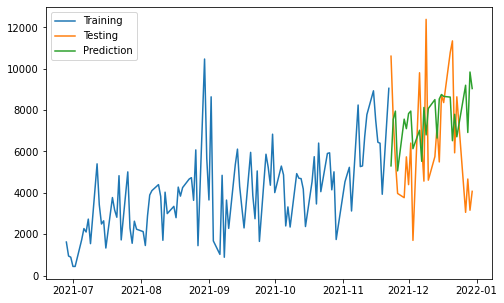

In [22]:
plt.figure(figsize = (8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'upper left')
plt.show()

SARIMAX Model Selection

In [39]:
train.head()

,revenues_from_appointment
Month,
2021-06-28,1622.54
2021-06-29,947.73
2021-06-30,891.24
2021-07-01,443.66
2021-07-02,443.55


In [41]:
train['month'] =train.index.month
train.head()

C:\Users\ABHIRO~1\AppData\Local\Temp/ipykernel_11200/4281435851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] =train.index.month


,revenues_from_appointment,month
Month,,
2021-06-28,1622.54,6
2021-06-29,947.73,6
2021-06-30,891.24,6
2021-07-01,443.66,7
2021-07-02,443.55,7


In [64]:
#adding exogenous variable

from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMAX Model
"""
SARIMAX_model = pm.auto_arima(train, exogenous=train['month'],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
"""
SARIMAX_model = SARIMAX(train,order=(3, 1, 1), seasonal_order=(1, 0, 1, 7))


C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ValueError: SARIMAX models require univariate `endog`. Got shape (105, 3).

In [24]:
train.head()

,revenues_from_appointment
Month,
2021-06-28,1622.54
2021-06-29,947.73
2021-06-30,891.24
2021-07-01,443.66
2021-07-02,443.55


In [48]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

AttributeError: 'SARIMAX' object has no attribute 'plot_diagnostics'

In [49]:
# Fit model
results = SARIMAX_model.fit()

# Inspect model
results.summary()

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:          revenues_from_appointment   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)   Log Likelihood                -919.067
Date:                            Fri, 03 Jun 2022   AIC                           1850.134
Time:                                    11:25:36   BIC                           1866.000
Sample:                                         0   HQIC                          1856.562
                                            - 105                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    104.2798     45.192      2.307      0.021      15.704     192.855
month       -472.3742    468.268     -1.009      0.313   -1390.162     445.414
ar.L1         -0.1837      0.091     -2.029      0.042      -0.361      -0.006
ma.L1         -0.8017      0.072    -11.101      0.000      -0.943      -0.660
ar.S.L7       -0.1385      0.106     -1.310      0.190      -0.346       0.069
sigma2      2.692e+06   3.18e+05      8.471      0.000    2.07e+06    3.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.27
Prob(Q):                              0.91   Prob(JB):                         0.19
Heteroskedasticity (H):               1.72   Skew:                             0.02
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
start=len(train)
end=len(train)+len(test)-1

In [62]:
print(results)

In [63]:
prediction = results.predict(start=start, end=end, dynamic=False, typ='levels')
prediction.columns = ['predicted revenue']
prediction

C:\Users\ABHIROCKZZZ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

TypeError: predict() missing 1 required positional argument: 'params'